In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

In [3]:
# Abrimos archivo 
df_Velocidad_sin_Rangos = pd.read_csv("../DataSet/Velocidad y Accesos por Provincias Historico.csv")

**Introducción**

En los últimos años, el acceso a Internet se ha convertido en un servicio esencial para el desarrollo social, económico y educativo. Este análisis examina la evolución de la conectividad en Argentina durante el período 2014-2024, enfocándose en tres aspectos fundamentales:

- Expansión de la cobertura (crecimiento en cantidad de accesos)

- Mejora en la calidad (aumento de velocidades de conexión)

- Adopción tecnológica (transición hacia infraestructuras más avanzadas)

A través de indicadores clave por provincia, identificamos avances significativos pero también brechas persistentes, particularmente entre regiones urbanas y rurales, regiones con mayor y menor población. Los resultados permiten evaluar el impacto de las políticas digitales y señalan las oportunidades de inversión para la inserción exitosa en el mercado.

In [4]:
df_Velocidad_sin_Rangos=df_Velocidad_sin_Rangos[df_Velocidad_sin_Rangos["Año"] >= 2018]

In [5]:
df_SumTotalArg = df_Velocidad_sin_Rangos.groupby(['Año', 'Trimestre'], as_index=False)['Accesos'].sum()
df_SumTotalArg['Periodo'] = df_SumTotalArg['Año'].astype(str) + 'T' + df_SumTotalArg['Trimestre'].astype(str)

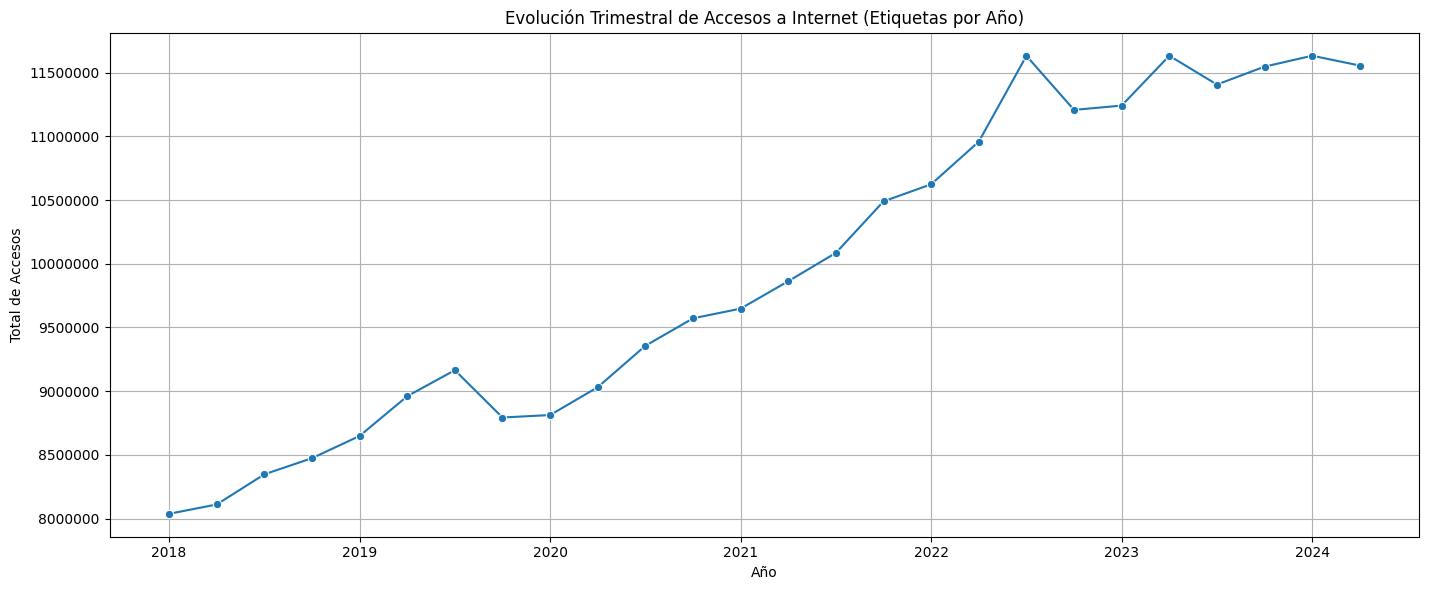

In [6]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_SumTotalArg, x='Periodo', y='Accesos', marker='o')

# Solo mostrar etiquetas del eje X cuando el trimestre es 1 (para que aparezca el año 1 vez por año)
ticks = df_SumTotalArg[df_SumTotalArg['Trimestre'] == 1].index
labels = df_SumTotalArg[df_SumTotalArg['Trimestre'] == 1]['Año']

plt.xticks(ticks=ticks, labels=labels)
plt.title('Evolución Trimestral de Accesos a Internet (Etiquetas por Año)')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.tight_layout()
plt.gca().ticklabel_format(style="plain", axis="y") 
plt.show()

**Evolución de la cantidad de accesos en el tiempo en Argentina**

Podemos observar una tendencia general de crecimiento, a lo largo de todo el período, se observa una tendencia creciente en la cantidad total de accesos. El número de accesos pasó de poco más de 8 millones a más de 11.5 millones, lo que refleja una expansión sostenida del acceso a internet en el país.

Este crecimiento puede explicarse por una mayor digitalización de los hogares, la expansión de la infraestructura de telecomunicaciones y la creciente necesidad de conectividad.

Aunque a fines de 2019 y comienzos de 2020 se observa una leve caída o estancamiento, a partir del segundo semestre de 2020 la cantidad de accesos comienza a crecer a un ritmo más acelerado. Esto se relaciona directamente con la pandemia de COVID-19, que obligó a trasladar gran parte de las actividades cotidianas —laborales, educativas y recreativas— al entorno digital.

A inicios de 2024 se detecta una leve disminución en el total de accesos. Aunque no es drástica, podría señalar un momento de transición tecnológica, estacionalidad o efectos económicos que afectaron la demanda.

In [3]:
df_accesos_x_tecnologia = pd.read_csv("../DataSet/Totales Accesos Por Tecnologia.csv")

In [7]:
# Agrupamos por Año y Trimestre, sumando los accesos y creamos una columna de período para el eje X usamos formato "Año-Trimestre"
data_acceso_tec = df_accesos_x_tecnologia.groupby(['Año', 'Trimestre']).sum().reset_index()
data_acceso_tec['Periodo'] = data_acceso_tec['Año'].astype(str) + 'T' + data_acceso_tec['Trimestre'].astype(str)

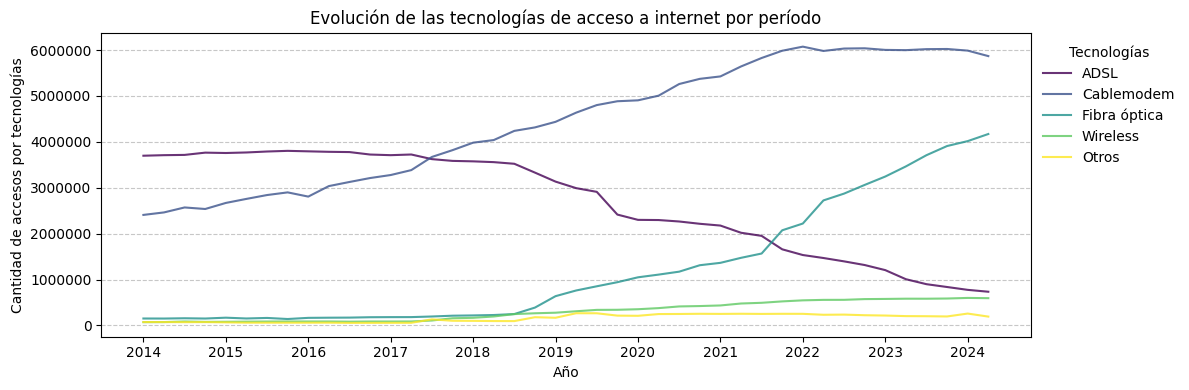

In [11]:
# Asignamos a una variable las columnas que se quieren graficar
tecnologias = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless", "Otros"]
data_acceso_tec.set_index('Periodo')[tecnologias].plot(kind="line", figsize=(12, 4), alpha=0.8, colormap="viridis")

# Graficamos la evolución de las tecnologías por período Año-Trimestre
plt.xlabel("Año")
plt.ylabel("Cantidad de accesos por tecnologías")
plt.title("Evolución de las tecnologías de acceso a internet por período")

periodos = data_acceso_tec['Periodo']
anios = data_acceso_tec['Año'].astype(str)
plt.xticks(ticks=range(0, len(periodos), 4), labels=anios[::4], rotation=0)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Tecnologías", loc="upper left", bbox_to_anchor=(1, 1), frameon=False)
plt.gca().ticklabel_format(style="plain", axis="y") 
plt.tight_layout()
plt.show()

**Conclusiones Evolución de las Tecnologías**

- *La fibra óptica evidencia un crecimiento sostenido*, especialmente marcado a partir de 2019. 
Su tendencia ascendente sugiere una clara preferencia por esta tecnología debido a su mayor velocidad y estabilidad.

- *Cablemódem mantiene su relevancia*, aunque su crecimiento se ha estabilizado en los últimos años. Su presencia dominante sugiere que sigue siendo una solución ampliamente utilizada, pero con menos expansión en comparación con la fibra óptica

- *El acceso mediante tecnologías inalámbricas(Wireless) ha crecido de forma constante*, ubicándose entre las tecnologías con mayor cantidad de accesos en los últimos años. Esto puede estar vinculado a zonas rurales o de difícil acceso para infraestructura cableada. 

**Relación entre tecnologías y velocidades**

La evolución de las velocidades de conexión está claramente relacionada con el avance tecnológico. El crecimiento de la fibra óptica impulsa el aumento de conexiones rápidas, mientras que la caída de tecnologías más antiguas como ADSL acompaña la desaparición de accesos de baja velocidad. Asimismo, el aumento del acceso inalámbrico podría estar mejorando la conectividad en zonas con menor infraestructura. En conjunto, los datos reflejan una transición hacia servicios más modernos y robustos.

In [14]:
df_rango_velocidad = pd.read_csv("../DataSet/Velocidad en Rangos en el tiempo.csv")

In [15]:
# Eliminamos las columnas que no queremos visualizar y sumamos los valores para graficar la evolución a lo largo de los años. 
# Se elige omitir la columna de otros al momento de mostrar ya que no respresenta un dato relevante o analizable

datos_rango_velocidad = df_rango_velocidad.drop(columns=["OTROS", "Total"])
# Agrupamos por Año y Trimestre para conservar la evolución trimestral
df_velocidad_periodo = datos_rango_velocidad.groupby(["Año", "Trimestre"]).sum().reset_index()

In [16]:
# Achicamos las columnas de rangos buscando tener rangos con mayor representatividad, para poder visualizar mejor al graficar
df_velocidad_periodo["Accesos con 1 Mbps o menos"] = df_velocidad_periodo["Hasta 512 kbps"] + df_velocidad_periodo["Entre 512 Kbps y 1 Mbps"]
df_velocidad_periodo.drop(columns=["Hasta 512 kbps", "Entre 512 Kbps y 1 Mbps"], inplace=True)
df_velocidad_periodo.insert(0, "Accesos con 1 Mbps o menos", df_velocidad_periodo.pop("Accesos con 1 Mbps o menos"))

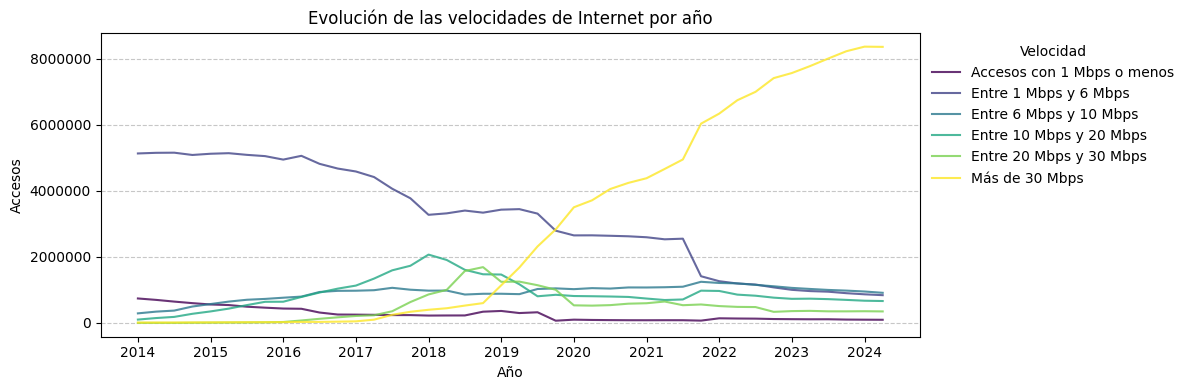

In [17]:
# Creamos una columna de período con formato Año-Trimestre
df_velocidad_periodo["Periodo"] = df_velocidad_periodo["Año"].astype(str) + "T" + df_velocidad_periodo["Trimestre"].astype(str)

# Graficamos la evolución
df_velocidad_periodo.set_index("Periodo").drop(columns=["Año", "Trimestre"]).plot(
    kind="line", figsize=(12, 4), alpha=0.8, colormap="viridis"
)

plt.xlabel("Año")
plt.ylabel("Accesos")
plt.title("Evolución de las velocidades de Internet por año")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar solo los años en el eje X
periodos = df_velocidad_periodo["Periodo"]
anios = df_velocidad_periodo["Año"].astype(str)
plt.xticks(ticks=range(0, len(periodos), 4), labels=anios[::4], rotation=0)

plt.legend(title="Velocidad", loc="upper left", bbox_to_anchor=(1, 1), frameon=False) 
plt.gca().ticklabel_format(style="plain", axis="y") 
plt.tight_layout()
plt.show()

**Evolución de las velocidades de conexión**

Las categorías de menor velocidad (hasta 6 Mbps) muestran una caída sostenida, prácticamente desapareciendo hacia 2024. Por el contrario, las conexiones de más de 30 Mbps presentan un crecimiento fuerte y constante, convirtiéndose en el tipo de acceso predominante en los últimos años, con más de 10 millones de accesos.

Este cambio refleja una modernización significativa del servicio y una mayor demanda por parte de los usuarios, impulsada por actividades que requieren alto ancho de banda como el streaming, gaming, videollamadas y trabajo remoto.

**Relación entre tecnologías y velocidades**

La evolución de las velocidades de conexión está claramente relacionada con el avance tecnológico. El crecimiento de la fibra óptica impulsa el aumento de conexiones rápidas, mientras que la caída de tecnologías más antiguas como ADSL acompaña la desaparición de accesos de baja velocidad. Asimismo, el aumento del acceso inalámbrico podría estar mejorando la conectividad en zonas con menor infraestructura. En síntesis, los datos reflejan una transición hacia servicios más modernos y robustos.

In [14]:
accesos_actuales_provincia = df_Velocidad_sin_Rangos[(df_Velocidad_sin_Rangos['Año'] == 2024) & (df_Velocidad_sin_Rangos['Trimestre'] == 2)]
accesos_actuales_provincia = accesos_actuales_provincia.groupby("Provincia")["Accesos"].sum().reset_index()
accesos_actuales_provincia = accesos_actuales_provincia.sort_values(by = "Accesos", ascending = False)

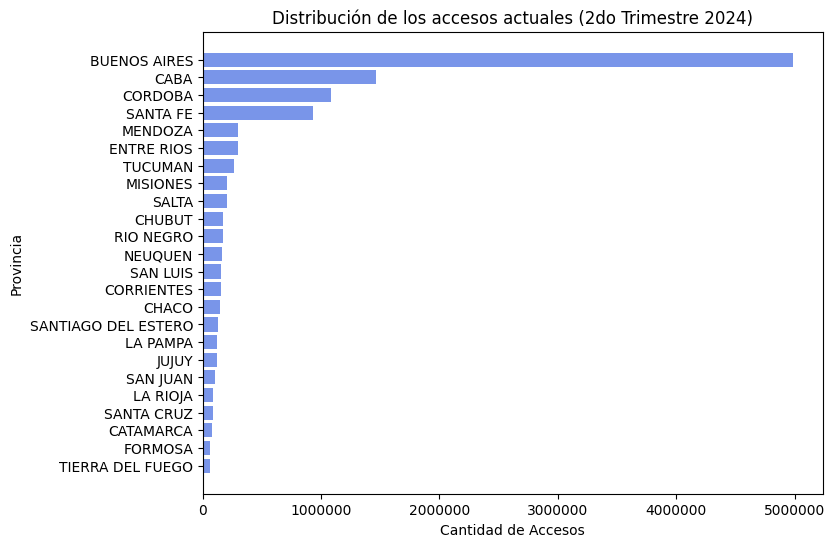

In [29]:
plt.figure(figsize=(8, 6))
plt.barh(accesos_actuales_provincia["Provincia"], accesos_actuales_provincia["Accesos"], color="royalblue", alpha=0.7)

plt.xlabel("Cantidad de Accesos")
plt.ylabel("Provincia")
plt.title("Distribución de los accesos actuales (2do Trimestre 2024)")

plt.gca().invert_yaxis()
plt.ticklabel_format(style="plain", axis="x")

plt.show()

**Distribución de accesos actuales (2do Trimestre 2024)**

- Buenos Aires es la provincia con la mayor cantidad de accesos a Internet, superando significativamente al resto, con un rango que llega hasta los 5,000,000 de accesos.

- Otras provincias como Córdoba, Santa Fe, Mendoza, Tucumán y Misiones también muestran un número considerable de accesos, aunque muy por debajo de Buenos Aires.

- Provincias como Formosa, Tierra del Fuego, Santa Cruz y Catamarca tienen la menor cantidad de accesos, lo que podría reflejar menor densidad poblacional o menor desarrollo de infraestructura digital.

In [16]:
# Agrupamos por Año, Trimestre y Provincia para mantener el detalle trimestral
df_accesos_tiempo = df_Velocidad_sin_Rangos.groupby(['Año', 'Trimestre', 'Provincia'])['Accesos'].sum().reset_index()
df_accesos_tiempo = df_accesos_tiempo.sort_values(by=["Provincia", "Año", "Trimestre"])

# Calculamos variación porcentual trimestral por provincia
df_accesos_tiempo["Variacion_Trimestral"] = df_accesos_tiempo.groupby("Provincia")["Accesos"].pct_change() * 100

# Calculamos el promedio de crecimiento trimestral por provincia
promedio_variacion_acc = df_accesos_tiempo.groupby("Provincia")["Variacion_Trimestral"].mean().sort_values(ascending=False)


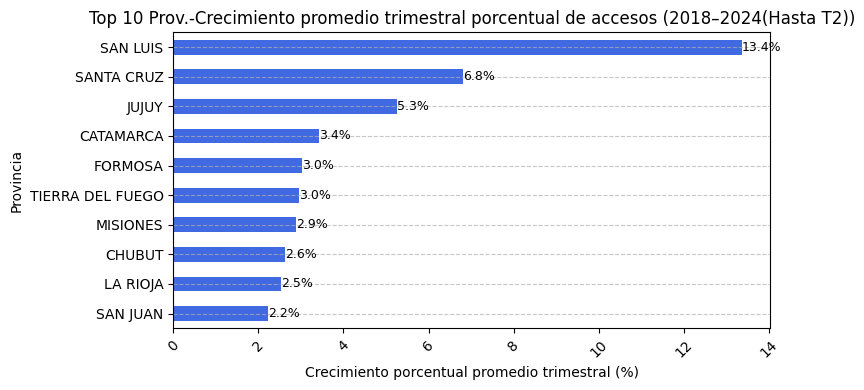

In [17]:
plt.figure(figsize=(8, 4))
top10 = promedio_variacion_acc.head(10)
top10.plot(kind="barh", color="royalblue")

plt.title("Top 10 Prov.-Crecimiento promedio trimestral porcentual de accesos (2018–2024(Hasta T2))")
plt.ylabel("Provincia")
plt.xlabel("Crecimiento porcentual promedio trimestral (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()

# Agregamos los porcentajes al final de cada barra
for i, (provincia, valor) in enumerate(top10.items()):
    plt.text(valor, i, f"{valor:.1f}%", va='center', fontsize=9)

plt.show()

**Crecimiento porcentual promedio trimestral de accesos (2018–2024):**

- San Luis lidera el crecimiento con un 14.5%, lo que indica una rápida expansión en la adopción de Internet, posiblemente debido a políticas locales o inversiones en infraestructura.

- Santa Cruz, Jujuy y Catamarca también muestran un crecimiento notable, sugiriendo un esfuerzo por reducir la brecha digital en regiones menos centrales.

- Provincias como Tierra del Fuego, Formosa y Misiones, a pesar de tener menos accesos en términos absolutos, están experimentando un crecimiento sostenido, lo que podría indicar una mejora en la conectividad.

- Buenos Aires y CABA, a pesar de tener la mayor cantidad de accesos, no aparece en el top 10 de crecimiento, lo que sugiere que su mercado podría estar cerca de la saturación.

In [30]:
df_vel_media_prov = pd.read_csv("../DataSet/Velocidad Media por Provincia en el Tiempo.csv")

<Figure size 800x400 with 0 Axes>

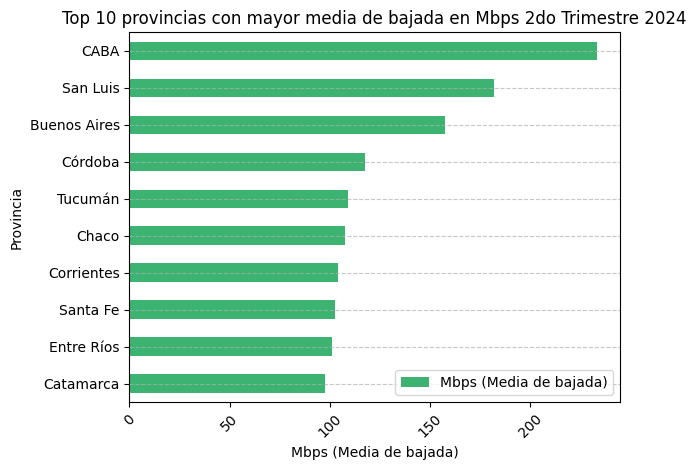

In [31]:
ultimo_periodo = df_vel_media_prov[(df_vel_media_prov['Año'] == 2024) & (df_vel_media_prov['Trimestre'] == 2)]

# Ordenar los valores por la media de bajada en orden descendente
ultimo_periodo_sorted = ultimo_periodo.sort_values(by="Mbps (Media de bajada)", ascending=False)

# Graficar top 10 de provincias con mayor media de Mbps (Media de bajada)
plt.figure(figsize=(8,4))
ultimo_periodo_sorted.head(10).plot(kind="barh", x="Provincia", y="Mbps (Media de bajada)", color="mediumseagreen")
plt.title("Top 10 provincias con mayor media de bajada en Mbps 2do Trimestre 2024")
plt.xlabel("Mbps (Media de bajada)")
plt.ylabel("Provincia")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

**Top 10 provincias con mayor velocidad media de bajada (2do trimestre 2024):**

- CABA lidera la lista, lo que refleja una infraestructura de Internet avanzada y posiblemente una mayor inversión en conectividad de alta velocidad.

- San Luis y Buenos Aires ocupan el segundo y tercer lugar, respectivamente, mostrando un desempeño sólido en velocidad de Internet.

- Provincias como Córdoba, Tucumán, Santa Fe y Entre Ríos también figuran en el top 10, lo que indica que las regiones centrales tienen velocidades competitivas y se deba seguramente la inversión en insfraestructura de tecnologías más modernas.

- La inclusión de Chaco y Catamarca sugiere que, aunque no son de las que presentan más conexiones absolutas, han logrado avances significativos en la calidad de su conexión a Internet.

In [ ]:
data_vel_media_prov = df_vel_media_prov.sort_values(by=["Provincia", "Año", "Trimestre"])

# Calcular variación porcentual trimestral
data_vel_media_prov["Variacion_trimestral"] = data_vel_media_prov.groupby("Provincia")["Mbps (Media de bajada)"].pct_change() * 100

# Calcular el promedio de esa variación por provincia
variacion_promedio_vel = data_vel_media_prov.groupby("Provincia")["Variacion_trimestral"].mean().sort_values(ascending=False)

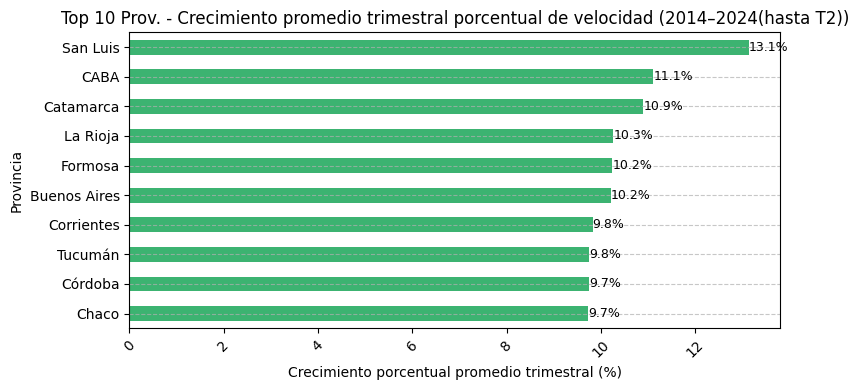

In [33]:
# Gráfico de barras horizontales con el top 10 mayor crecimiento medio porcentual
plt.figure(figsize=(8, 4))
top10_vel = variacion_promedio_vel.head(10)
top10_vel.plot(kind="barh", color="mediumseagreen")

plt.title("Top 10 Prov. - Crecimiento promedio trimestral porcentual de velocidad (2014–2024(hasta T2))")
plt.ylabel("Provincia")
plt.xlabel("Crecimiento porcentual promedio trimestral (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()

# Agregamos los porcentajes al final de cada barra
for i, (provincia, valor) in enumerate(top10_vel.items()):
    plt.text(valor, i, f"{valor:.1f}%", va='center', fontsize=9)

plt.show()

**Crecimiento promedio trimestral de la velocidad (2014–2024):**

- San Luis destaca nuevamente con un crecimiento del 13.1%, consolidándose como una provincia con un desarrollo acelerado en infraestructura digital.

- CABA (11.1%) y Catamarca (10.9%) también muestran crecimientos notables.

- Chaco vuelve a aparecer en el ranking de las que más crece en la mejoría de la velocidad.

In [22]:
df_penetracion_poblacion = pd.read_csv("../DataSet/Penetración Población.csv")

In [23]:
penetracion_poblacion_actual = df_penetracion_poblacion[(df_penetracion_poblacion["Año"] == 2024) & (df_penetracion_poblacion["Trimestre"] == 2)]
penetracion_poblacion_actual = penetracion_poblacion_actual.sort_values(by="Accesos por cada 100 hab", ascending=False)

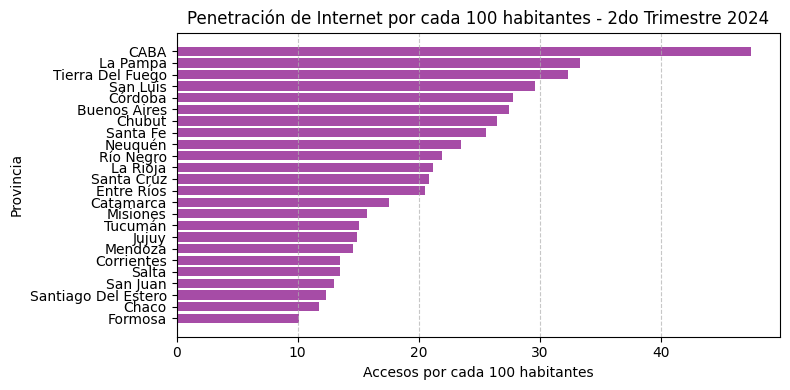

In [24]:
# Gráficamos la penetración por cada 100 habitantes registradas en el último período
plt.figure(figsize=(8, 4))
plt.barh(penetracion_poblacion_actual["Provincia"], penetracion_poblacion_actual["Accesos por cada 100 hab"], color="purple", alpha=0.7)

plt.xlabel("Accesos por cada 100 habitantes")
plt.ylabel("Provincia")
plt.title("Penetración de Internet por cada 100 habitantes - 2do Trimestre 2024")
plt.gca().invert_yaxis()
plt.ticklabel_format(style="plain", axis="x")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Penetración por cada 100 habitantes**

- CABA lidera la penetración de Internet, seguida por La Pampa, Tierra del Fuego y San Luis, lo que refleja una mayor adopción en zonas urbanas y provincias con menor densidad poblacional pero mejor infraestructura.

- Provincias del norte y noreste (Chaco, Formosa, Santiago del Estero, Salta, Corrientes) ocupan los últimos puestos, evidenciando una brecha digital significativa en estas regiones, posiblemente por falta de inversión en conectividad o acceso económico.

In [25]:
df_penetracion_hogares = pd.read_csv("../DataSet/Penetración Hogares.csv")

In [26]:
penetracion_hogares_actual = df_penetracion_hogares[(df_penetracion_hogares["Año"] == 2024) & (df_penetracion_hogares["Trimestre"] == 2)]
penetracion_hogares_actual = penetracion_hogares_actual.sort_values(by="Accesos por cada 100 hogares", ascending=False)

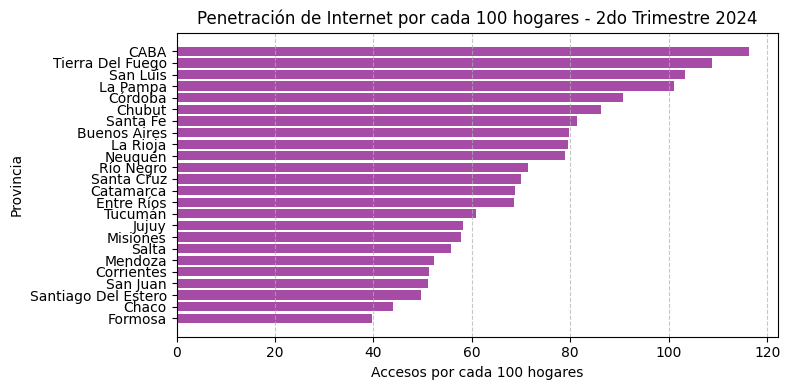

In [27]:
# Gráficamos la penetración por cada 100 hogares registradas en el último período
plt.figure(figsize=(8, 4))
plt.barh(penetracion_hogares_actual["Provincia"], penetracion_hogares_actual["Accesos por cada 100 hogares"], color="purple", alpha=0.7)

plt.xlabel("Accesos por cada 100 hogares")
plt.ylabel("Provincia")
plt.title("Penetración de Internet por cada 100 hogares - 2do Trimestre 2024")
plt.gca().invert_yaxis()
plt.ticklabel_format(style="plain", axis="x")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Penetración por cada 100 hogares**

- CABA y Tierra del Fuego destacan nuevamente, pero aquí San Luis y La Pampa aparecen muy cerca, lo que indica que en estos territorios no solo hay alta adopción individual, sino también una cobertura casi universal en hogares.

- Chubut, Santa Fe y Córdoba mantienen una posición sólida, mientras que Buenos Aires queda en un rango medio, quizás por la heterogeneidad en su territorio (ej. zonas rurales vs. urbanas).

- Chaco y Formosa repiten como las peores posicionadas, confirmando un problema estructural de acceso en estas provincias, ya sea por falta de infraestructura, altos costos o baja demanda por condiciones socioeconómicas.

**Conclusión y oportunidades estratégicas por provincia**

El análisis a nivel nacional revela una expansión sostenida en los accesos a Internet, impulsada por una creciente demanda digital y un proceso de modernización tecnológica. Este crecimiento se traduce en un mercado con alto dinamismo y variadas oportunidades según la región analizada.

En ese contexto, *Buenos Aires y CABA* siguen siendo epicentros indiscutidos en cuanto a cantidad de accesos absolutos y calidad del servicio, con velocidades promedio de bajada destacadas y una penetración por hogar e individuo muy elevada. No obstante, su madurez de mercado y posible saturación implican que las oportunidades de expansión podrían estar más ligadas a la diferenciación del servicio y la mejora de la experiencia del usuario.

Por otro lado, provincias como *San Luis* surgen como un claro benchmark de desarrollo: combina un crecimiento porcentual trimestral sostenido tanto en cantidad de accesos como en velocidad media, con altos niveles de penetración. Su caso puede estudiarse como modelo de políticas públicas o inversiones exitosas en infraestructura, replicable en otros contextos.

Finalmente, se destacan provincias con un perfil de alto potencial de crecimiento e inversión, como *Catamarca, Misiones y Jujuy*. Aunque aún se encuentran por debajo del promedio en cantidad de accesos absolutos, exhiben una marcada tendencia de mejora tanto en crecimiento de conexiones como en velocidades, lo que indica un proceso de transformación en marcha. Estas regiones representan una oportunidad concreta para expandir servicios, captar nuevos usuarios y posicionarse como referentes en conectividad en áreas tradicionalmente rezagadas.

En síntesis, la empresa podrá aprovechar este análisis para tomar decisiones estratégicas segmentadas: consolidar su liderazgo en mercados desarrollados, replicar buenas prácticas en territorios con desempeño sobresaliente y apostar por el crecimiento en zonas emergentes con alto potencial, como las mencionadas. Una estrategia equilibrada entre consolidación y expansión permitirá brindar servicios de calidad y fortalecer su presencia a nivel nacional.